Algoritam preuzet od: https://medium.com/mlearning-ai/designing-a-optimal-knn-regression-model-for-predicting-house-price-with-boston-housing-dataset-faef377536e3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import os

In [2]:
df = pd.read_csv('../../preprocessing/apartments_preprocessed.csv')

In [3]:
df.head()
df['price'].describe()

count     9922.000000
mean      1481.016831
std        948.711174
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      25000.000000
Name: price, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import train_test_split

# Karakteristike
X = df[['square_meters','luxury','longitude','latitude']] # Features
y = df['price'] # Target: price

# Podela na test i trening skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41)

# Ispis informacija o veličini trening i test skupa
print("Veličina X_train:", X_train.shape)
print("Veličina X_test:", X_test.shape)
print("Veličina y_train:", y_train.shape)
print("Veličina y_test:", y_test.shape)

Veličina X_train: (7937, 4)
Veličina X_test: (1985, 4)
Veličina y_train: (7937,)
Veličina y_test: (1985,)


In [6]:
y_train

5848     689
121      760
8160    1255
6578    2650
6410     859
        ... 
8513    1575
5200    1191
4066    1849
931     1195
1984    2000
Name: price, Length: 7937, dtype: int64

Za atribute 'bathrooms', 'bedrooms', 'square_meters' potrebno je racunati euklidsku udaljenost, ali za udaljenost po preciznoj lokaciji nam je potrebna drugacija funkcija. Za racunanje rastojanja na Zemlji koristi se posebna haversine distanca (source: stackoverflow). Tako da za prva tri atributa udaljenost biti racunata uz pomoc euklidskog, a za poslednja dva uz pomoc haversine rastojanja

In [7]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371  # Prosečni poluprečnik Zemlje u kilometrima
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [8]:
def custom_distance(x, y):
    euc_distance = np.sqrt(np.sum((x[:2] - y[:2])**2))  # Euklidska udaljenost za prva četiri atributa
    haversine_dist = haversine_distance((x[2], x[3]), (y[2], y[3]))  # Haversine udaljenost za longitude i latitude
    total_distance = np.sqrt(euc_distance**2 + haversine_dist**2)
    return total_distance

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

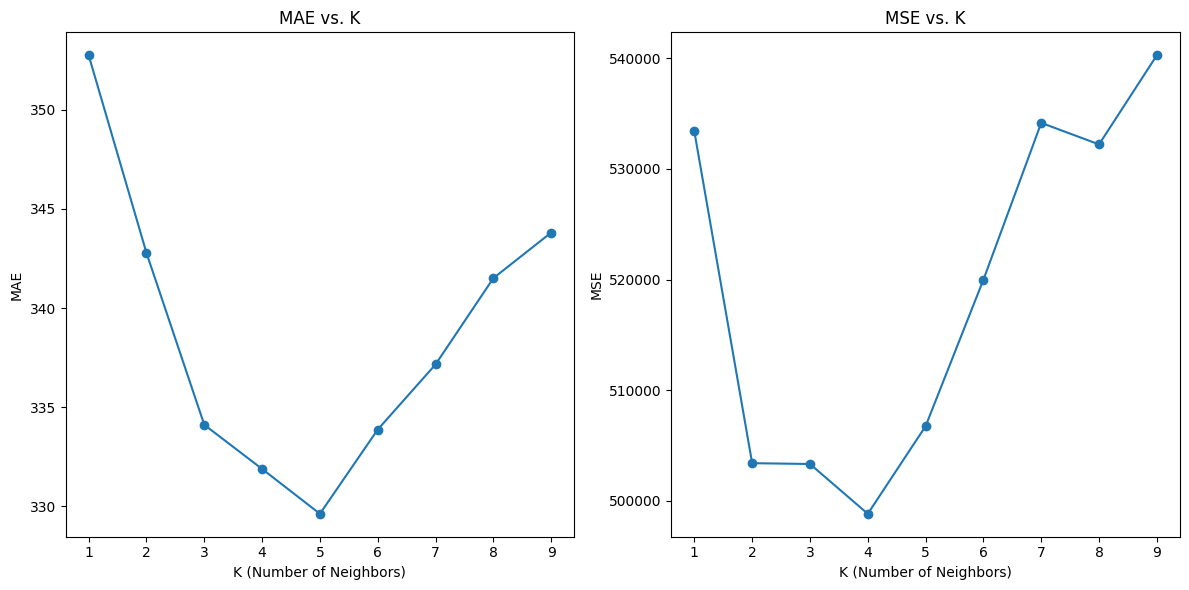

Best K based on MAE: 5
Best K based on MSE: 4


In [10]:
# Izbor za optimalno k
k_values = np.arange(1, 10)  #

mae_values = []
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric = custom_distance)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    mae_values.append(mae)
    mse_values.append(mse)

# Plot MAE 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, mae_values, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('MAE')
plt.title('MAE vs. K')

# Plot MSE
plt.subplot(1, 2, 2)
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('MSE')
plt.title('MSE vs. K')

plt.tight_layout()
plt.show()

# Optimalno k je tamo gde je indeks najmanje vrednosti u listama
best_k_mae = k_values[np.argmin(mae_values)]
best_k_mse = k_values[np.argmin(mse_values)]

print(f"Best K based on MAE: {best_k_mae}")
print(f"Best K based on MSE: {best_k_mse}")

In [11]:
k = 5  
knn_regressor = KNeighborsRegressor(n_neighbors=k, metric=custom_distance)
knn_regressor.fit(X_train, y_train) # treninranje modela

KNeighborsRegressor(metric=<function custom_distance at 0x7f935eefd090>)

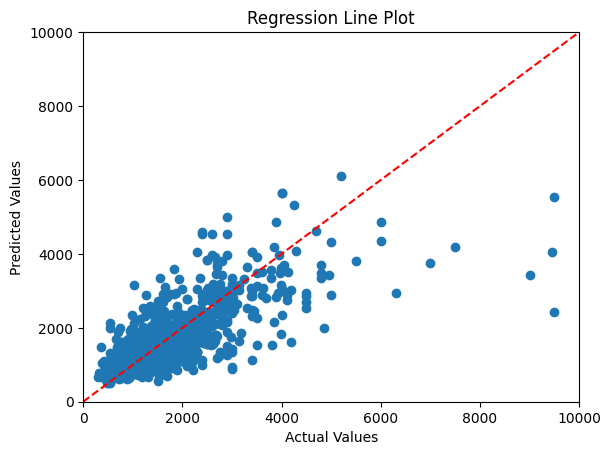

In [12]:
Y_pred = knn_regressor.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np

# Vizuelizacija
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line Plot")

# Ogranicavanje vrednosti na osama
plt.xlim(0,10000)
plt.ylim(0, 10000)

# Linija regresije
x_values = np.linspace(0, 10000, 100)  
plt.plot(x_values, x_values, color='red', linestyle='--')

plt.show()

In [13]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 329.6302267002519
MSE: 506751.8651889168
RMSE: 711.8650610817451
